In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

In [2]:
%matplotlib inline

In [3]:
data = pd.read_excel('final_version.xlsx', header=None)

In [4]:
data = data.to_numpy()[1:]

In [5]:
idx = 0

In [6]:
X, Y = [], []

In [7]:
while True:
    if idx+15 >= len(data):
        break
    X.append(data[idx:idx+15])
    Y.append(data[idx+15])
    idx += 1

In [8]:
X = np.array(X)
Y = np.array(Y)

In [49]:
!pyenv versions

  system
* 3.5.2 (set by /Users/bagminseo/.pyenv/version)


In [9]:
# """norm"""

In [10]:
# tot = np.concatenate((np.array(X[0]), Y))

In [11]:
# def scaler(L, mode=0, min_val=None, max_val=None):
#     L = np.array(L)
    
#     if min_val == None:
#         min_val = L.min()
#     if max_val == None:
#         max_val = L.max()
    
#     if mode == 0:
#         return (L - min_val) / (max_val - min_val), min_val, max_val
#     elif mode == 1:
#         avg_val = (min_val + max_val) / 2.
#         return (L - avg_val) / (max_val - avg_val), min_val, max_val
#     else:
#         return None, min_val, max_val
    

In [12]:
# min_year, max_year =   min(tot[:, 0]), max(tot[:, 0])
# min_month, max_month = min(tot[:, 1]), max(tot[:, 1])
# min_day, max_day =     min(tot[:, 2]), max(tot[:, 2])
# min_temp, max_temp =   min(tot[:, 3]), max(tot[:, 3])
# min_rain, max_rain =   min(tot[:, 4]), max(tot[:, 4])

In [13]:
# X_year,  _, _ = scaler(X[:, :, 0].reshape(-1).tolist(), min_val=min_year,  max_val=max_year)
# X_month, _, _ = scaler(X[:, :, 1].reshape(-1).tolist(), min_val=min_month, max_val=max_month)
# X_day,   _, _ = scaler(X[:, :, 2].reshape(-1).tolist(), min_val=min_day,   max_val=max_day)
# X_temp,  _, _ = scaler(X[:, :, 3].reshape(-1).tolist(), min_val=min_temp,  max_val=max_temp, mode=1)
# X_rain,  _, _ = scaler(X[:, :, 4].reshape(-1).tolist(), min_val=min_rain,  max_val=max_rain)

In [14]:
# Y_year,  _, _ = scaler(Y[:, 0].reshape(-1).tolist(), min_val=min_year,  max_val=max_year)
# Y_month, _, _ = scaler(Y[:, 1].reshape(-1).tolist(), min_val=min_month, max_val=max_month)
# Y_day,   _, _ = scaler(Y[:, 2].reshape(-1).tolist(), min_val=min_day,   max_val=max_day)
# Y_temp,  _, _ = scaler(Y[:, 3].reshape(-1).tolist(), min_val=min_temp,  max_val=max_temp, mode=1)
# Y_rain,  _, _ = scaler(Y[:, 4].reshape(-1).tolist(), min_val=min_rain,  max_val=max_rain)

In [15]:
# X = np.concatenate((
#     X_year.reshape(-1, 15, 1),
#     X_month.reshape(-1, 15, 1),
#     X_day.reshape(-1, 15, 1),
#     X_temp.reshape(-1, 15, 1),
#     X_rain.reshape(-1, 15, 1)), axis=-1)

In [16]:
# Y = np.concatenate((
#     Y_year.reshape(-1, 1),
#     Y_month.reshape(-1, 1),
#     Y_day.reshape(-1, 1),
#     Y_temp.reshape(-1, 1),
#     Y_rain.reshape(-1, 1)), axis=-1)

In [17]:
from sklearn.model_selection import train_test_split
# X_train, X_tmp, Y_train, Y_tmp = train_test_split(X, Y, test_size=0.2)
# X_test, X_val, Y_test, Y_val = train_test_split(X_tmp, Y_tmp, test_size=0.5)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [18]:
X_train = np.array(X_train)[:, :, [1, 3, 4]]
Y_train = np.array(Y_train)[:, -1].reshape(-1, 1)

X_test = np.array(X_test)[:, :, [1, 3, 4]]
Y_test = np.array(Y_test)[:, -1].reshape(-1, 1)

In [19]:
"""extend"""

'extend'

In [20]:
X_nonzero = []
Y_nonzero = []
for i, y in enumerate(Y_train):
    if y[-1] != 0.0:
        X_nonzero.append(X_train[i])
        Y_nonzero.append(y)

In [21]:
X_train = np.concatenate((X_train, X_nonzero, X_nonzero, X_nonzero))

In [22]:
Y_train = np.concatenate((Y_train, Y_nonzero, Y_nonzero, Y_nonzero))

In [23]:
import keras
from keras.layers import Input, Dense, LSTM, Dropout
from keras.models import Model

Using TensorFlow backend.


In [24]:
def build_model(input_shape):
    x = Input(shape=input_shape)

    # h = LSTM(20, return_sequences=True, activation='tanh', kernel_initializer='he_normal')(x)
    # h = LSTM(20, return_sequences=True, activation='tanh', kernel_initializer='he_normal')(h)
    # h = LSTM(20, activation='tanh', kernel_initializer='he_normal')(h)
    h = LSTM(80, activation='tanh', kernel_initializer='he_normal')(x)  # 128
    
    y = Dense(1, activation='relu')(h)
    return Model(inputs=x, outputs=y)


In [25]:
model = build_model((15, 3))
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 15, 3)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 80)                26880     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 81        
Total params: 26,961
Trainable params: 26,961
Non-trainable params: 0
_________________________________________________________________


In [26]:
from keras.optimizers import Adam, RMSprop

In [27]:
model.compile(loss='mse', optimizer=Adam(), metrics=['mae'])

In [28]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [29]:
es = EarlyStopping(monitor='val_mae', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_mae', mode='min', save_best_only=True)

In [30]:
hist = model.fit(
    X_train, Y_train,
    batch_size=128,
    validation_split=0.2,
    epochs=20000,
    verbose=2,
    callbacks=[es, mc])

Train on 26548 samples, validate on 6638 samples
Epoch 1/20
 - 4s - loss: 336.3477 - mae: 7.4469 - val_loss: 601.2058 - val_mae: 11.2513
Epoch 2/20
 - 3s - loss: 308.0169 - mae: 8.0282 - val_loss: 557.4937 - val_mae: 11.2988
Epoch 3/20
 - 3s - loss: 295.6917 - mae: 8.1188 - val_loss: 542.4472 - val_mae: 11.2713
Epoch 4/20
 - 4s - loss: 289.4256 - mae: 8.1183 - val_loss: 529.5293 - val_mae: 11.3026
Epoch 5/20
 - 3s - loss: 285.9349 - mae: 8.1230 - val_loss: 521.5242 - val_mae: 11.3358
Epoch 6/20
 - 3s - loss: 283.1225 - mae: 8.1138 - val_loss: 517.7663 - val_mae: 11.2979
Epoch 7/20
 - 3s - loss: 281.2551 - mae: 8.0966 - val_loss: 512.6035 - val_mae: 11.3085
Epoch 8/20
 - 3s - loss: 279.6522 - mae: 8.0853 - val_loss: 509.4981 - val_mae: 11.3015
Epoch 9/20
 - 3s - loss: 278.3391 - mae: 8.0433 - val_loss: 506.7883 - val_mae: 11.2381
Epoch 10/20
 - 3s - loss: 276.9926 - mae: 8.0005 - val_loss: 503.0489 - val_mae: 11.2404
Epoch 11/20
 - 3s - loss: 275.8484 - mae: 8.0074 - val_loss: 502.5477 

In [31]:
import matplotlib.pyplot as plt

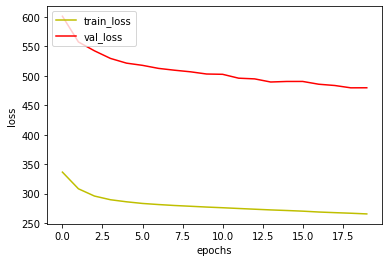

In [32]:
plt.plot(hist.history['loss'], 'y', label='train_loss')
plt.plot(hist.history['val_loss'], 'r', label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc='upper left')
plt.show()

In [33]:
loss, mae = model.evaluate(X_test, Y_test)

4380/4380 [==============================] - 0s 63us/step


In [34]:
print(loss, mae)

258.3207188715129 6.5550689697265625


In [35]:
from random import randint

In [36]:
N = 1000

In [37]:
samples = [randint(0, len(X_test)-1) for _ in range(N)]

In [38]:
pred = model.predict([X_test[samples]])

In [39]:
pred = pred.reshape(-1)

In [40]:
real = Y_test[samples]

In [41]:
real = real.reshape(-1)

In [42]:
# """norm"""

In [43]:
# pred = pred * (max_rain - min_rain) + min_rain

In [44]:
# real = real * (max_rain - min_rain) + min_rain

In [45]:
pred

array([2.06388054e+01, 2.01332068e+00, 3.64078617e+00, 0.00000000e+00,
       9.67289448e-01, 1.08983669e+01, 4.42302048e-01, 3.94781733e+00,
       2.62088633e+00, 2.13427544e+00, 3.36730957e+00, 1.91523242e+00,
       0.00000000e+00, 3.25307965e-01, 4.91571474e+00, 0.00000000e+00,
       2.93076611e+00, 2.38474512e+00, 4.87482834e+00, 6.02747345e+00,
       0.00000000e+00, 2.41743565e+00, 2.48297272e+01, 1.00766544e+01,
       2.78030181e+00, 3.85016084e+00, 1.48366606e+00, 2.20399213e+00,
       1.18946397e+00, 1.08661251e+01, 7.46028852e+00, 0.00000000e+00,
       9.67448950e-01, 0.00000000e+00, 1.14073467e+00, 7.16035843e+00,
       5.04137158e-01, 3.45261955e+00, 1.12498260e+00, 2.67474480e+01,
       1.34048576e+01, 2.97743678e+00, 3.60670495e+00, 0.00000000e+00,
       0.00000000e+00, 2.38474512e+00, 3.78506732e+00, 5.70572710e+00,
       1.44825327e+00, 6.66316032e-01, 0.00000000e+00, 1.79551296e+01,
       4.92577934e+00, 1.52315159e+01, 2.58536577e+00, 1.26113987e+01,
      

In [46]:
real

array([9.6, 0, 7.8, 0.1, 0, 0, 1.7, 0, 0, 1.4, 0, 57.4, 0, 0.6, 0, 0, 0,
       0, 0, 0, 0.5, 0, 68.5, 0, 0, 0, 0, 0, 0, 1.1, 0, 0, 0, 0, 0, 21.7,
       0, 0, 0, 17.3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0, 3, 0, 7.5, 0, 0,
       10.5, 101.4, 0, 0, 0, 1.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2, 9, 0,
       0, 0, 0.9, 2.5, 0.8, 0, 28, 0, 0.7, 0, 0, 0, 0, 12.4, 3.4, 1.6,
       74.3, 1.5, 0, 1.4, 0, 0, 0, 0, 0, 0, 43.6, 0, 0, 0, 0, 0, 0, 0, 0,
       0.2, 0, 16.6, 3.5, 0, 6.1, 0, 0.3, 0, 0, 0, 0, 0, 0, 0, 0, 0.7,
       0.1, 0, 14.7, 0, 0, 0, 44.1, 11.5, 0, 0, 18.8, 5.2, 0, 0.1, 0, 0,
       0, 17.8, 268.2, 0.2, 6.4, 0, 0, 0, 0, 0, 0.2, 0, 0, 0, 1.6, 0, 0.1,
       0, 0, 0, 0, 0, 4.4, 8.5, 12.5, 0, 1, 0.2, 0, 0, 0, 0, 36, 0, 0, 0,
       0, 0, 0, 4, 0, 20, 0, 0, 0.1, 0.8, 0, 0, 1.2, 0, 0, 0, 0, 97.6, 0,
       21.9, 0.3, 0, 0.7, 0, 0, 0, 0, 0.1, 0, 0.4, 0, 9.6, 0, 1.2, 0, 0,
       0, 95.4, 1, 0, 7.9, 4, 14.1, 0, 0.7, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0.1, 0, 0.9, 0, 0, 0, 0, 0, 0, 1.4, 0, 0,

In [47]:
res = np.abs(pred - real)

In [48]:
print(np.mean(res), np.max(res), np.min(res))

6.763488874906299 246.36112632751463 0.0
